<a href="https://colab.research.google.com/github/ridaouiafaf/diabetes_prediction_model/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goal: Predict if a person is diabetic (1) or not (0) based on medical measurements.

Type: Binary Classification

Evaluation Metric: Accuracy, F1-score, ROC AUC

Link to dataset: https://www.kaggle.com/datasets/mathchi/diabetes-data-set

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [5]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

**Problem detected:**

In real-world healthcare data:

Blood pressure = 0 is not physiologically possible for a living person.

Similarly, Glucose, BMI, Skin Thickness, Insulin = 0 are usually indicators of missing or improperly recorded data, not actual values.

So, for 0s in these columns; it's missing data, not a genuine zero.

**Solution:**

=> Replace Zeros with Mean/Median (Imputation), recommended for healthcare datasets where losing data is costly.

**Data cleaning & Preprocessing:**

In [6]:
import numpy as np

for col in ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']:
  df[col]=df[col].replace(0,np.nan)


df.fillna(df.mean(), inplace=True)
# .mean() ignores missing values (NaN), not zeroes.
# So we need to convert invalid zeroes into NaN first, otherwise .mean() will calculate the wrong average (including those invalid zeroes).

In [7]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.435949      12.096346       8.790942   85.021108   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.202592      29.153420  155.548223   
75%       6.000000  140.250000      80.000000      32.000000  155.548223   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.875151                  0.331329   11.760232    0.476951  
min     18.200000                  

**Data Visualization:**

In [8]:
import seaborn as sns #Stylish, statistical visualizations
import matplotlib.pyplot as plt #Needed for showing or customizing plots

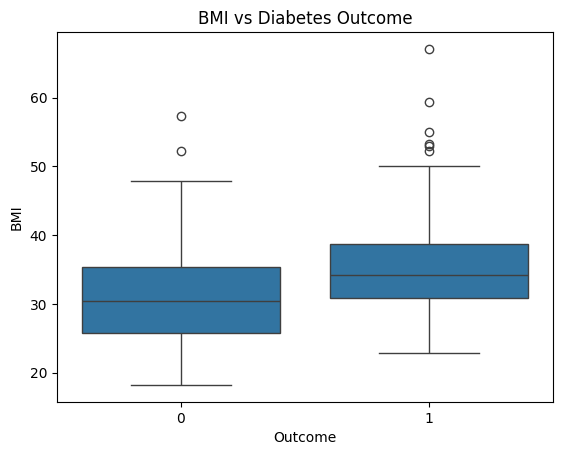

In [12]:
sns.boxplot(x='Outcome',y='BMI',data=df) # boxplot = box and whisker plot
plt.title("BMI vs Diabetes Outcome")
plt.show()
# theory behind it undertood it on : https://www.youtube.com/watch?v=fHLhBnmwUM0

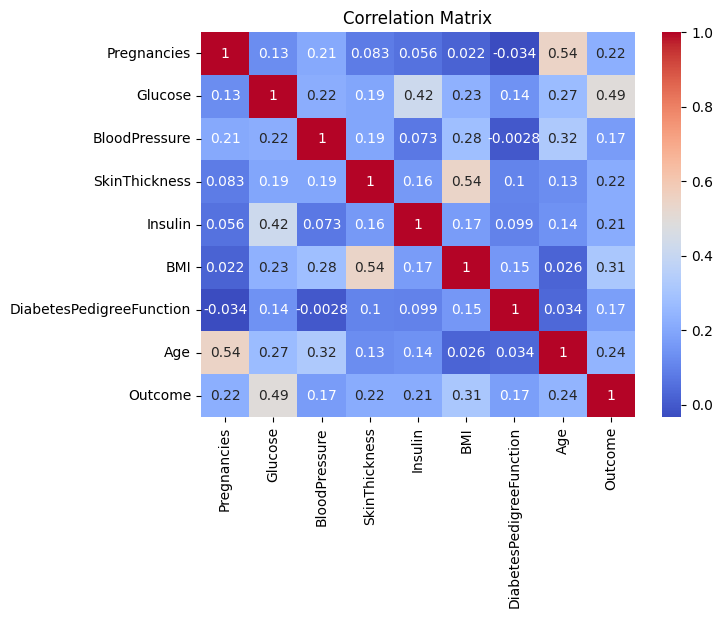

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# This one shows how strongly a feature is related to diabetes (Outcome).

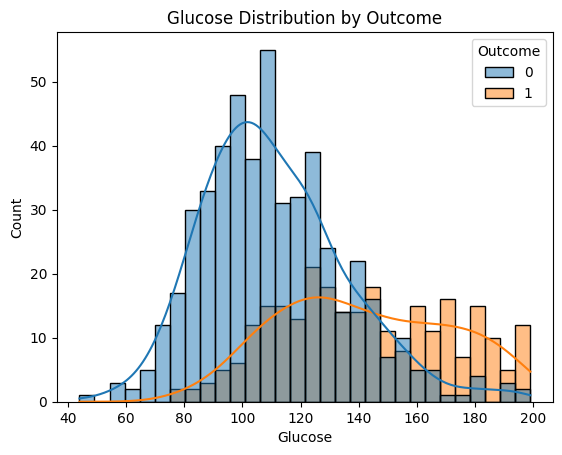

In [13]:
# Two overlapping histograms
sns.histplot(data=df, x='Glucose', hue='Outcome', kde=True, bins=30)
plt.title('Glucose Distribution by Outcome')
plt.show()


The three visuals show how Glucose is highly related to being diagnosed with Diabetes.

**Data Preparing:**

In [14]:
from sklearn.preprocessing import StandardScaler #StandardScaler comes from sklearn.preprocessing and will normalize the features.

X = df.drop('Outcome',axis=1)
# This removes the Outcome column, because it is what we wanna predict. axis=1 → Means “drop a column” (not a row).

y = df['Outcome']

scaler = StandardScaler() #This creates a scaling tool which will normalize the features so that each column will have mean = 0 and std dev = 1

X_scaled = scaler.fit_transform(X)

**Splitting Data into Train/Test:**

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

🔹 Parameters explained:
**test_size=0.2**
This means: 20% of the data will go into the test set, and 80% into the training set.

💡 Common values are:

0.2 (80% train / 20% test) ← ⭐️ Most used

0.3 (70% train / 30% test)

You can adjust this depending on your dataset size. For example, if you have a lot of data, even 10% might be enough for testing.

**random_state=42**
This is just a seed number for the random split.

It ensures reproducibility — so every time you run the code, you get the same split.

You can set this to any number, like 1, 42, 2025 — it doesn’t matter. But if you want to repeat your experiments or share your code, keep it fixed.

📌 Without setting random_state, every run will give a different train/test split, and your model’s performance might vary slightly.

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train,y_train)

LogisticRegression()

In [17]:
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score

y_pred = model.predict(X_test) # uses the trained logistic regression model to make predictions on unseen data

print(confusion_matrix(y_test,y_pred)) # prints confusion matrix, which helps evaluate classification performance.
print(classification_report(y_test,y_pred)) # gives a full breakdown of metrics
print("ROC AUC Score:", roc_auc_score(y_test,model.predict_proba(X_test)[:,1])) # gives probabilities for class 1

[[82 17]
 [21 34]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154

ROC AUC Score: 0.8242424242424242


✅**Confusion Matrix layout:**

                
                   |(predicted) 0    1
        -------+--------
        
       |  (actual)         0   | TN  FP

       |  (actual)         1   | FN  TP


TN (True Negative): predicted 0, actually 0

TP (True Positive): predicted 1, actually 1

FP (False Positive): predicted 1, actually 0

FN (False Negative): predicted 0, actually 1

✅**Metrics:**

Precision → How many predicted 1s were actually 1

Recall (Sensitivity) → How many actual 1s did we correctly catch

F1-score → Balance between precision & recall

Accuracy → How many total predictions were correct

✅**Probabilities:**

model.predict_proba(X_test) → gives probabilities for both classes:

Column [:,0] → prob. for class 0

Column [:,1] → prob. for class 1 (e.g., having diabetes)

roc_auc_score(y_test, probs) → gives the ROC AUC which measures how well the model separates the two classes. Range: 0.5 (random guessing) → 1.0 (perfect separation)

**Ours got 0.82 which means he separates the two classes very well ;).**

Let's make this project more fun and squeeze more skills & techniques!

**🤔 1. Cross-validation**

Why?

First, I split the data once (80/20). But in real research, that’s not enough to trust performance.
Cross-validation helps understand:

*   What variance means in model results
*   How to get more reliable scores
*   How small data splits can impact ML outcomes in healthcare

Let's learn:

*   How to use cross_val_score from sklearn
*   Why some models perform differently each time


In [18]:
from sklearn.model_selection import cross_val_score

model = LogisticRegression(max_iter=1000)
# and yes you don’t need to create another notebook at all! You're totally fine to reuse or reassign the model variable right in the same notebook or cell.



```
max_iter=1000
```

This means maximum number of iterations allowed during training for the model to find the best parameters.

**Why set this?**

Logistic regression is trained using optimization algorithms (like gradient descent).

* Sometimes the algorithm doesn’t "converge" (finish learning) in the default number of steps.

* Setting max_iter=1000 gives it more room to finish training, especially if:

* You have many features

* The data is not well scaled (though you're using StandardScaler, which is good)

* The default max_iter is 100, which is often too low for healthcare data.

In [19]:
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='roc_auc')
# cv=5 means the data is split into 5 parts, and the model is trained/tested 5 times.
# scoring='roc_auc' gives us the same metric used before for consistency.

In [20]:
print("Cross-Validation ROC AUC Scores: ", cv_scores)
print("Mean ROC AUC Score:", cv_scores.mean()) # mean score gives a better general estimate of performance than a single train/test split.

Cross-Validation ROC AUC Scores:  [0.81425926 0.80018519 0.85222222 0.88566038 0.8409434 ]
Mean ROC AUC Score: 0.8386540880503146


✅ Highest = 0.886, Lowest = 0.800 — this shows low variance across folds →  model is stable.

✅ Mean = 0.839 — slightly better than original 0.824, which was based on a single 80/20 split.

**🤔 2. Hyperparameter Tuning**

We can tune the Logistic Regression model to see if we can push ROC AUC even higher, and learn how model complexity impacts results.

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100], # regularization strength
    'penalty': ['l1','l2'], # type of regularization
    'solver': ['liblinear'] # optimization algorithm
}

This is a dictionary that defines the hyperparameters to test for LogisticRegression model.


🧠 What is Regularization?

Regularization helps prevent overfitting.
It does this by adding a penalty to the model when it becomes too "complex."

⚙️ But what do we mean by “complex”?

In models like logistic regression or linear regression:
* Complexity often means the model uses very large weights (coefficients).
* Large weights can cause the model to be overly sensitive to noise in the data.

📦 Regularization = Keeping the Model Simple

So we add a penalty term to the loss function to:

* Keep the weights small,
* Avoid relying too heavily on any one feature,
* Encourage the model to generalize better.

✌️ Two Types in The code:

1. L1 regularization (Lasso):
  * Encourages some weights to become exactly zero.
  * Helps in feature selection — the model keeps only important features.

2. L2 regularization (Ridge):
  * Encourages weights to be small, but not exactly zero.
  * Smooths the model’s predictions.

⚖️ The Parameter C in Logistic Regression

In LogisticRegression, we control the strength of regularization with C:

* Smaller C → more regularization (more penalty)

* Larger C → less regularization (let model fit more freely)

So, penalize just means:

> "Hey model, if you're too confident or trying too hard to fit everything, I’m going to punish you a bit to stop you from memorizing!"



💡 Analogy Time

Imagine you're studying for an exam.

No regularization: You memorize every question and answer from last year’s paper. Great on the mock exam — but fail the real one.

With regularization: You learn the key concepts and patterns, not the exact answers — and you're ready for any question that shows up. ✅





In [22]:
# GridSearchCV will try every combination of the values provided, and train a model for each one using cross-validation.
model = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring = 'roc_auc')

**How many combinations does this create?**

* 5 values of C

* 2 penalties

* 1 solver

👉 Total: 5 × 2 × 1 = 10 models will be trained and compared.

In [23]:
grid_search.fit(X_scaled,y)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='roc_auc')

**🧠 What is .fit() doing here?**

You're training multiple logistic regression models with different combinations of parameters, all defined in param_grid.

Under the hood:

* It tries every combination of 'C', 'penalty', and 'solver'.

* For each combination, it uses 5-fold cross-validation (because cv=5) on the entire dataset (X_scaled, y).

* It scores each model using ROC AUC.

* It picks the combination that gives the best average score across all folds.

🔧 Example
Let’s say:

* C: 0.1, 1

* penalty: l1, l2

* solver: liblinear

That’s 2 × 2 = 4 combinations, and for each, it'll do 5 cross-validation folds → so it’s training 20 models in total!


In [24]:
print("Best Model:", grid_search.best_estimator_)
print("Best ROC AUC Score:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)

Best Model: LogisticRegression(C=10, max_iter=1000, penalty='l1', solver='liblinear')
Best ROC AUC Score: 0.8386918238993711
Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [25]:
# evaluating the new model on your X_test and see if it improved there too.

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("ROC AUC Score on Test Set:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]))

Confusion Matrix:
[[85 14]
 [19 36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        99
           1       0.72      0.65      0.69        55

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.78      0.79      0.78       154

ROC AUC Score on Test Set: 0.8479338842975206


✅ What is AUC?
AUC = Area Under the ROC Curve

It tells you how well your model can distinguish between the two classes (e.g., diabetic vs. non-diabetic).

The ROC curve plots:

True Positive Rate (TPR) on the Y-axis

False Positive Rate (FPR) on the X-axis

AUC is just the area under this curve — a number between 0 and 1.

📊 How to Interpret AUC

AUC Score	What It Means
* 0.5	Model is guessing randomly 😕
* 0.6–0.7	Poor, slightly better than random
* 0.7–0.8	Fair, okay model 👍
* 0.8–0.9	Good model! Strong separation between classes 💪
* 0.9–1.0	Excellent! But maybe overfitting if too perfect ⚠️
* 1.0	Perfect prediction — rare in real life


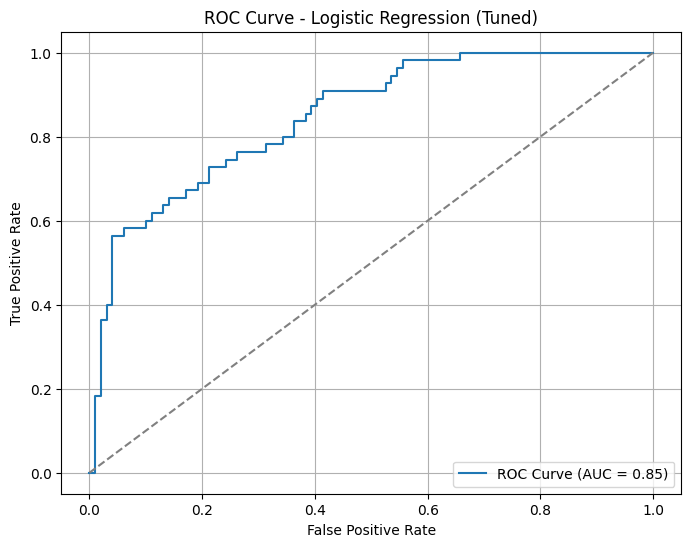

In [26]:
from sklearn.metrics import roc_curve, auc

y_scores = best_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
# fpr = False Positive Rate = % of actual negatives wrongly predicted as positives.
# tpr = True Positive Rate (also called Recall) = % of actual positives correctly predicted.
# thresholds = probability cutoffs used to decide whether a prediction is class 1 or class 0.


roc_auc = auc(fpr,tpr) #calculates the AUC (Area Under Curve) of the ROC

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray') # diagonal reference line: it shows a random classifier (AUC = 0.5).

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (Tuned)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

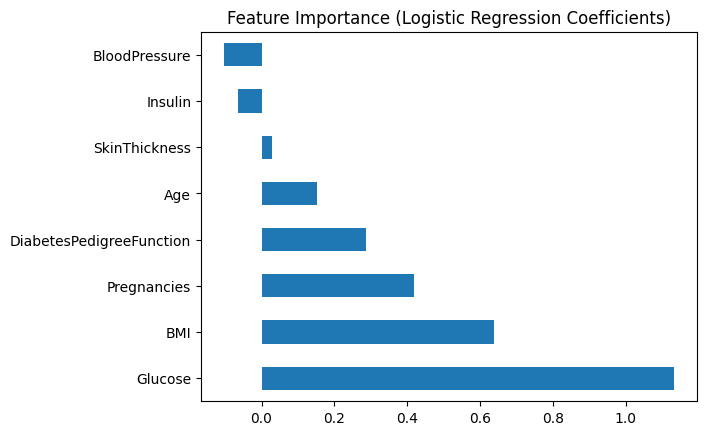

In [30]:
# Get feature importances (coefficients)

coeff = pd.Series(best_model.coef_[0], index=X.columns)
coeff.sort_values(ascending=False).plot(kind='barh')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()

**Explainability:**

* 🧠 What is SHAP?

SHAP stands for SHapley Additive exPlanations.
It’s a powerful method used to explain how a model makes decisions, especially in complex models (like XGBoost, Random Forest, even Logistic Regression).

* 🧩 Key Idea:

SHAP is based on game theory — it assigns each feature a “contribution score” (called SHAP value) that tells how much that feature pushed the model’s prediction up or down for a specific instance.

Imagine each feature is a “player” in a game. SHAP tells us how much each “player” helped the “team” (the prediction)!

* 🔍 Why it's useful in healthcare:

Because doctors and stakeholders need explanations, not just predictions.
SHAP lets your model justify its decisions — for example:

> "The model thinks this patient has diabetes because of high glucose and BMI."



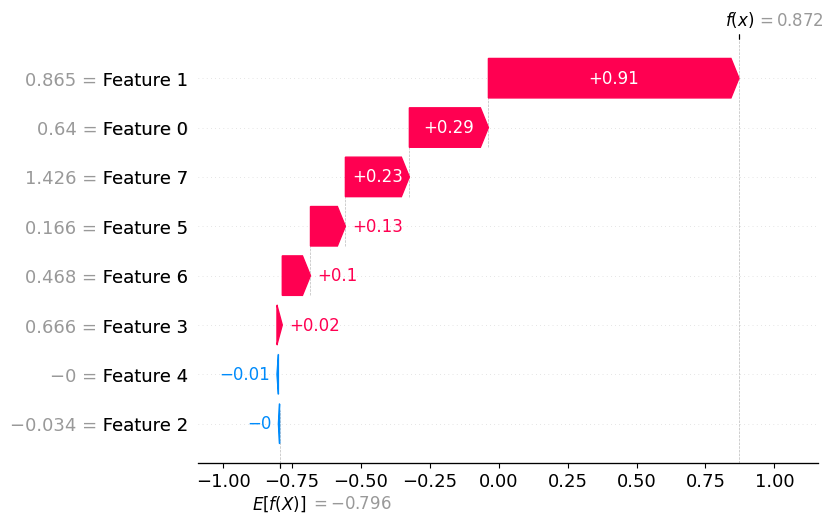


 🔍 Prediction Explanation for Sample Index 0
➡ This person has **Diabetes**

🌟 Likely because of:
➤ Glucose.
➤ Pregnancies.
➤ Age.

🌟 Features pushing the prediction towards this decision:
➤ Glucose = 148.00 (impact: +0.909)
➤ Pregnancies = 6.00 (impact: +0.287)
➤ Age = 50.00 (impact: +0.232)
➤ BMI = 33.60 (impact: +0.127)
➤ DiabetesPedigreeFunction = 0.63 (impact: +0.102)

🛡️ Features pushing against this prediction:
➤ BloodPressure = 72.00 (impact: -0.004)
➤ Insulin = 155.55 (impact: -0.005)


In [42]:
# Step 1: Initialize SHAP explainer
#  Create a SHAP explainer object that can explain predictions made by your trained model (like Logistic Regression) on the scaled feature set X_scaled.
explainer = shap.Explainer(best_model,X_scaled)


# Step 2: Get SHAP values for all instances
shap_values = explainer(X_scaled)
# Compute SHAP values” = explain what made the model predict what it did — for each patient and for each feature.




# Step 3: Pick a sample index (say the first one)
shap.plots.waterfall(shap_values[0]) #visualize it

index = 0
shap_vals = shap_values[index].values # SHAP values for this row
base_value = shap_values[index].base_values  #Average prediction of the model (like the baseline)
features = X.columns #Names of your features (like Glucose, BMI, Age...)
instance_data = X.iloc[index] #Actual values of the selected patient



# Step 4: Create a DataFrame to sort and explain
#Create a DataFrame to combine then sort it by impact (from highest positive to most negative).
shap_df = pd.DataFrame({
    'feature': features,
    'shap_value': shap_vals,
    'value': instance_data.values
}).sort_values(by='shap_value', ascending=False)



# Step 5: Interpret the top features

#Print what the model predicted for that specific row
print("\n 🔍 Prediction Explanation for Sample Index", index)
if best_model.predict([X_scaled[index]])[0] == 1:
    print("➡ This person has **Diabetes**")
    print("\n🌟 Likely because of:")
    for _, row in shap_df[shap_df['shap_value'] > 0].head(3).iterrows():
          print(f"➤ {row['feature']}.")

else:
    print("➡ This person has **No Diabetes**")

# Display the top 5 features that contributed positively to the prediction (pushed it toward diabetes)
print("\n🌟 Features pushing the prediction towards this decision:")
for _, row in shap_df[shap_df['shap_value'] > 0].head(5).iterrows():
    print(f"➤ {row['feature']} = {row['value']:.2f} (impact: +{row['shap_value']:.3f})")

# Show the features that reduced the model’s confidence, or made it lean toward “No Diabetes”.
print("\n🛡️ Features pushing against this prediction:")
for _, row in shap_df[shap_df['shap_value'] < 0].tail(5).iterrows():
    print(f"➤ {row['feature']} = {row['value']:.2f} (impact: {row['shap_value']:.3f})")
